In [1]:
import os
os.chdir('/Users/melon/Documents/Stat/assignment_1/Data')
os.getcwd()

'/Users/melon/Documents/Stat/assignment_1/Data'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

sns.set(style="whitegrid")

In [3]:
regions = pd.read_csv('countries_regions.csv',sep=',',header='infer')

In [4]:
def remove_outlier_IQR(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# GDP

In [5]:
gdp = pd.read_csv('gdp.csv',sep=',',header='infer')

<AxesSubplot:>

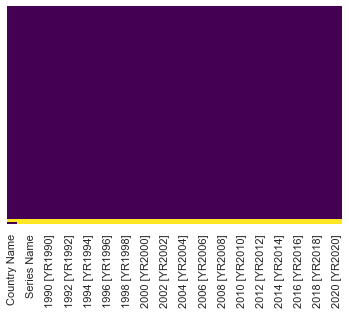

In [6]:
sns.heatmap(gdp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
gdp.replace({'..':np.nan} , inplace=True)
gdp

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,17805113119,19907317066,20146404996,20497126770,19134211764,18116562465,18753469630,18053228579,18799450743,20116137326
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,2028553750,1099559028,652174990.8,1185315468,1880951520,2392764853,...,12890764531,12319830437,12776220507,13228147516,11386850130,11861199831,13019689337,15156432310,15400242875,14887629268
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,62048562947,45715614560,48003078389,49945599429,42543178042,41764315330,...,200013052199,209058991952,209755003251,213810024944,165979279263,160034163871,170097014589,174910878623,171767403748,145009181491
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,570000000,640000000,638000000,643000000,673000000,671000000,612000000,639000000,648000000,709000000
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1029048482,1106928583,1210013652,1007025755,1017549124,1178738991,...,3629203786,3188808943,3193704343,3271808157,2789870188,2896679212,3000180750,3218316013,3155065488,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

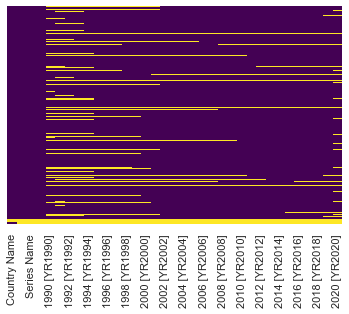

In [8]:
sns.heatmap(gdp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df1 = regions.join(gdp[['2008 [YR2008]' , '2018 [YR2018]']])
df1

,CountryName,Region,ThirdWorld,2008 [YR2008],2018 [YR2018]
0,Afghanistan,South Asia,1,10109305183,18053228579
1,Albania,Eastern Europe,0,12881353508,15156432310
2,Algeria,Africa,0,171000699877,174910878623
3,American Samoa,Australia and Oceanea,0,560000000,639000000
4,Andorra,Western Europe,0,4085630584,3218316013
...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,4244000000,3900000000
213,West Bank and Gaza,Middle East,0,7310400000,16276600000
214,"Yemen, Rep.",Middle East,1,26910851362,21606140907
215,Zambia,Africa,1,17910858638,26311590297


In [10]:
df1 = df1.astype({'2008 [YR2008]':float, '2018 [YR2018]':float})
df1.rename(columns={'2008 [YR2008]':'GDP[2008]','2018 [YR2018]':'GDP[2018]'} , inplace=True)
# df1.loc[:,['GDP[2008]']] = df1['GDP[2008]'].astype(np.float64)
# df1.loc[:,['GDP[2018]']] = df1['GDP[2018]'].astype(np.float64)

In [11]:
df1_copy = df1.copy()
df1_copy = df1_copy.loc[ df1_copy["ThirdWorld"] == 1]
df1_copy["Region"] = 'ThirdWorld'

In [12]:
df1 = df1.append(df1_copy , ignore_index=True)
df1.drop(['ThirdWorld'], axis=1 , inplace=True)
df1

,CountryName,Region,GDP[2008],GDP[2018]
0,Afghanistan,South Asia,1.010931e+10,1.805323e+10
1,Albania,Eastern Europe,1.288135e+10,1.515643e+10
2,Algeria,Africa,1.710007e+11,1.749109e+11
3,American Samoa,Australia and Oceanea,5.600000e+08,6.390000e+08
4,Andorra,Western Europe,4.085631e+09,3.218316e+09
...,...,...,...,...
259,Tuvalu,ThirdWorld,3.029022e+07,4.258816e+07
260,Uganda,ThirdWorld,1.444040e+10,3.292703e+10
261,Vanuatu,ThirdWorld,5.907482e+08,9.147279e+08
262,"Yemen, Rep.",ThirdWorld,2.691085e+10,2.160614e+10


<AxesSubplot:>

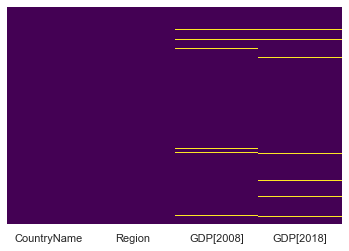

In [13]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df1.drop(df1[df1.Region == "Thailand"].index , inplace=True)
df1.drop(df1[df1.Region == "Australia and Oceanea"].index , inplace=True)
df1 = df1.dropna()

<AxesSubplot:>

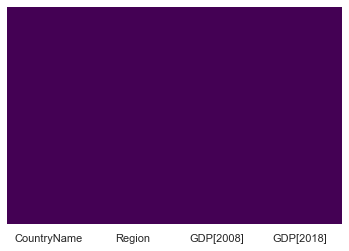

In [15]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df1

,CountryName,Region,GDP[2008],GDP[2018]
0,Afghanistan,South Asia,1.010931e+10,1.805323e+10
1,Albania,Eastern Europe,1.288135e+10,1.515643e+10
2,Algeria,Africa,1.710007e+11,1.749109e+11
4,Andorra,Western Europe,4.085631e+09,3.218316e+09
5,Angola,Africa,8.853861e+10,1.013532e+11
...,...,...,...,...
259,Tuvalu,ThirdWorld,3.029022e+07,4.258816e+07
260,Uganda,ThirdWorld,1.444040e+10,3.292703e+10
261,Vanuatu,ThirdWorld,5.907482e+08,9.147279e+08
262,"Yemen, Rep.",ThirdWorld,2.691085e+10,2.160614e+10


In [17]:
df2 = df1.copy()
df2 = df2.melt(id_vars=[ "CountryName" ,"Region"],  var_name="Years", value_name="GDP")
df2

,CountryName,Region,Years,GDP
0,Afghanistan,South Asia,GDP[2008],1.010931e+10
1,Albania,Eastern Europe,GDP[2008],1.288135e+10
2,Algeria,Africa,GDP[2008],1.710007e+11
3,Andorra,Western Europe,GDP[2008],4.085631e+09
4,Angola,Africa,GDP[2008],8.853861e+10
...,...,...,...,...
455,Tuvalu,ThirdWorld,GDP[2018],4.258816e+07
456,Uganda,ThirdWorld,GDP[2018],3.292703e+10
457,Vanuatu,ThirdWorld,GDP[2018],9.147279e+08
458,"Yemen, Rep.",ThirdWorld,GDP[2018],2.160614e+10


In [18]:
def plot_graph(df , title , title2 , type_year1 , type_year2 , fliers=True , log=True):
    f, axes = plt.subplots(1, 2 , figsize=(16,5))
    sns.boxplot(data = df1 
                , x='Region' 
                , y= type_year1
                , ax=axes[0]
                , showfliers = fliers).set_title(title)
    if log==True:
        axes[0].set_yscale("log")
    axes[0].tick_params(axis='x', rotation=45)

    sns.boxplot(data = df1 
                , x='Region' 
                , y= type_year2
                , ax=axes[1]
                , showfliers = fliers ).set_title(title2)
    if log==True:
        axes[1].set_yscale("log")
    axes[1].tick_params(axis='x', rotation=45)

### GDP 2008 , GDP 2018 with outlier

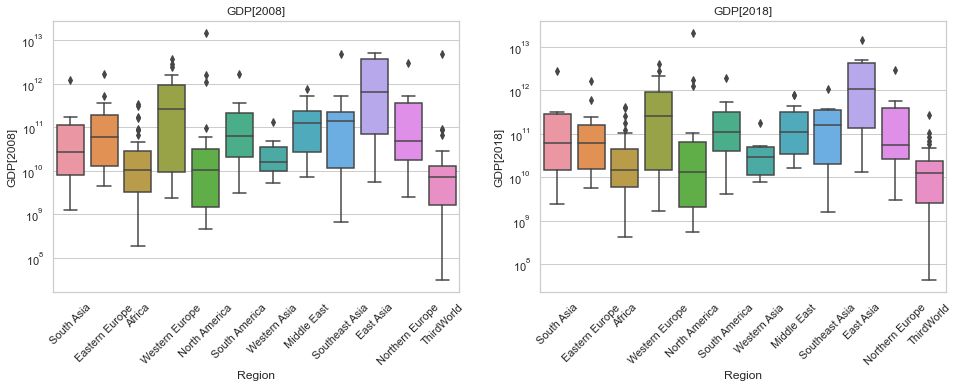

In [19]:
plot_graph(df1 , 'GDP[2008]' , 'GDP[2018]' , 'GDP[2008]' , 'GDP[2018]' , fliers=True )

### GDP 2008 , GDP 2018 without outlier

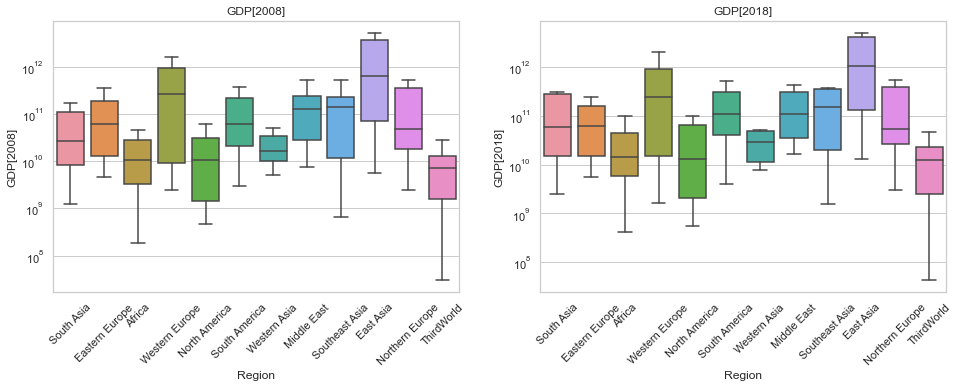

In [20]:
plot_graph(df1 , 'GDP[2008]' , 'GDP[2018]' , 'GDP[2008]' , 'GDP[2018]' , fliers=False)

### Compare "GDP" of all regions between YR2008 and YR2018 (with outlier)

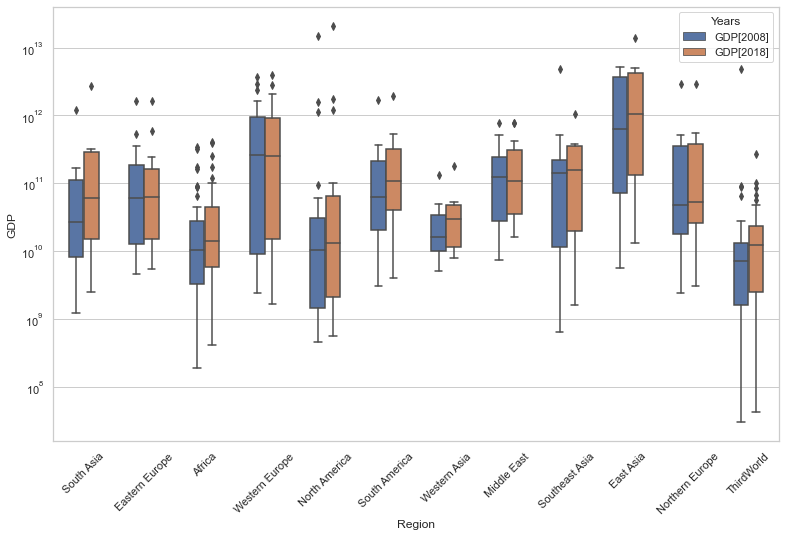

In [21]:
plt.figure(figsize = (13,8))
ax = sns.boxplot(data=df2
                 , x='Region'
                 , y='GDP' 
                 , hue="Years" 
                 , width=0.5)
ax.set_yscale("log")
sns.set(font_scale = 1.2)
ax.tick_params(axis='x', rotation=45)

### Compare "GDP" of all regions between YR2008 and YR2018 (without outlier)

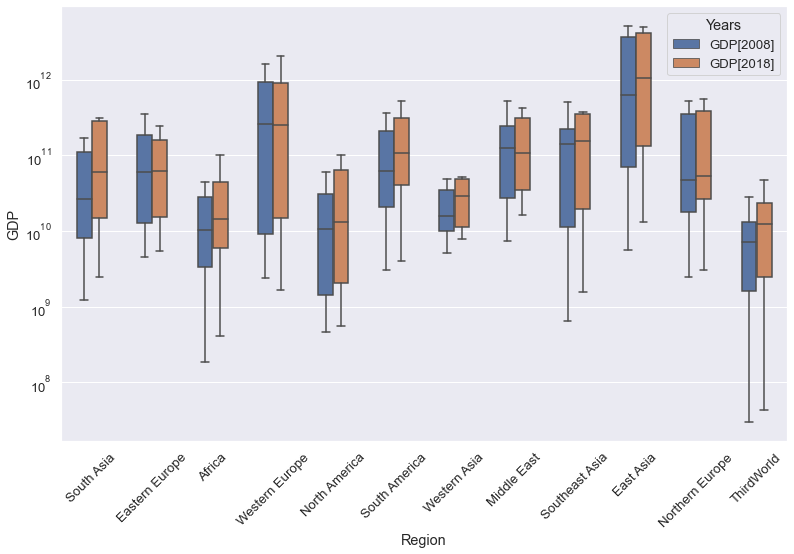

In [22]:
plt.figure(figsize = (13,8))
ax = sns.boxplot(data=df2, x='Region', y='GDP' , hue="Years" , width=0.5 , showfliers=False)
ax.set_yscale("log")
ax.tick_params(axis='x', rotation=45)

# Population

In [23]:
population = pd.read_csv('population.csv',sep=',',header='infer')

In [24]:
population.replace({'..':np.nan} , inplace=True)
df1 = regions.join(population[['2008 [YR2008]' , '2018 [YR2018]']])

In [25]:
df1 = df1.astype({'2008 [YR2008]':float, '2018 [YR2018]':float})
df1.rename(columns={'2008 [YR2008]':'Population[2008]','2018 [YR2018]':'Population[2018]'} , inplace=True)

In [26]:
df1

,CountryName,Region,ThirdWorld,Population[2008],Population[2018]
0,Afghanistan,South Asia,1,27722281.0,37171922.0
1,Albania,Eastern Europe,0,2947314.0,2866376.0
2,Algeria,Africa,0,34730604.0,42228415.0
3,American Samoa,Australia and Oceanea,0,57490.0,55461.0
4,Andorra,Western Europe,0,83860.0,77008.0
...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,108397.0,107001.0
213,West Bank and Gaza,Middle East,0,3591977.0,4569087.0
214,"Yemen, Rep.",Middle East,1,21892149.0,28498683.0
215,Zambia,Africa,1,12848531.0,17351714.0


In [27]:
df2 = df1.copy()
df2 = df2.melt(id_vars=["CountryName", "Region"], var_name="Years", value_name="Population")
df2

,CountryName,Region,Years,Population
0,Afghanistan,South Asia,ThirdWorld,1.0
1,Albania,Eastern Europe,ThirdWorld,0.0
2,Algeria,Africa,ThirdWorld,0.0
3,American Samoa,Australia and Oceanea,ThirdWorld,0.0
4,Andorra,Western Europe,ThirdWorld,0.0
...,...,...,...,...
646,Virgin Islands (U.S.),North America,Population[2018],107001.0
647,West Bank and Gaza,Middle East,Population[2018],4569087.0
648,"Yemen, Rep.",Middle East,Population[2018],28498683.0
649,Zambia,Africa,Population[2018],17351714.0


In [28]:
df1_copy = df1.copy()
df1_copy = df1_copy.loc[ df1_copy["ThirdWorld"] == 1]
df1_copy["Region"] = 'ThirdWorld'

In [29]:
df1 = df1.append(df1_copy , ignore_index=True)
df1.drop(['ThirdWorld'], axis=1 , inplace=True)
df1

,CountryName,Region,Population[2008],Population[2018]
0,Afghanistan,South Asia,27722281.0,37171922.0
1,Albania,Eastern Europe,2947314.0,2866376.0
2,Algeria,Africa,34730604.0,42228415.0
3,American Samoa,Australia and Oceanea,57490.0,55461.0
4,Andorra,Western Europe,83860.0,77008.0
...,...,...,...,...
259,Tuvalu,ThirdWorld,10315.0,11505.0
260,Uganda,ThirdWorld,30431734.0,42729032.0
261,Vanuatu,ThirdWorld,224700.0,292675.0
262,"Yemen, Rep.",ThirdWorld,21892149.0,28498683.0


In [30]:
df1.drop(df1[df1.Region == "Thailand"].index , inplace=True)
df1.drop(df1[df1.Region == "Australia and Oceanea"].index , inplace=True)
df1 = df1.dropna()

In [31]:
df2 = df1.copy()
df2 = df2.melt(id_vars=[ "CountryName" ,"Region"],  var_name="Years", value_name="Population")
df2

,CountryName,Region,Years,Population
0,Afghanistan,South Asia,Population[2008],27722281.0
1,Albania,Eastern Europe,Population[2008],2947314.0
2,Algeria,Africa,Population[2008],34730604.0
3,Andorra,Western Europe,Population[2008],83860.0
4,Angola,Africa,Population[2008],21695636.0
...,...,...,...,...
479,Tuvalu,ThirdWorld,Population[2018],11505.0
480,Uganda,ThirdWorld,Population[2018],42729032.0
481,Vanuatu,ThirdWorld,Population[2018],292675.0
482,"Yemen, Rep.",ThirdWorld,Population[2018],28498683.0


### Population 2008 , Population 2018 with outlier

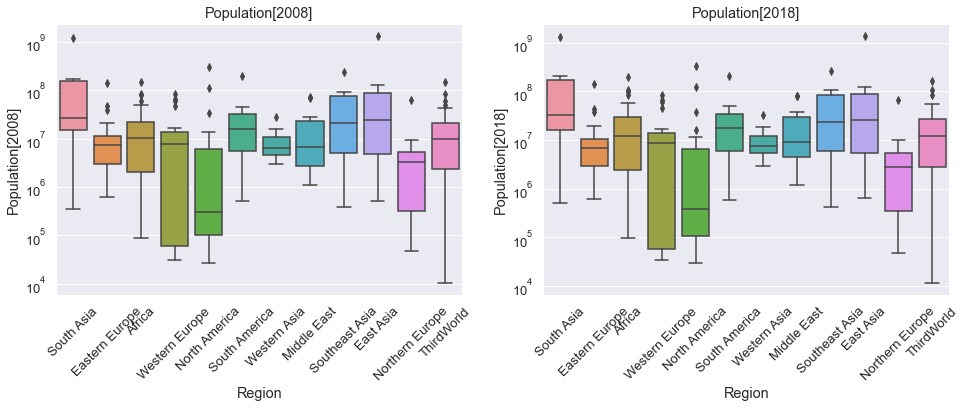

In [32]:
plot_graph(df1 , 'Population[2008]' , 'Population[2018]' , 'Population[2008]' , 'Population[2018]')

### Population 2008 , Population 2018 without outlier

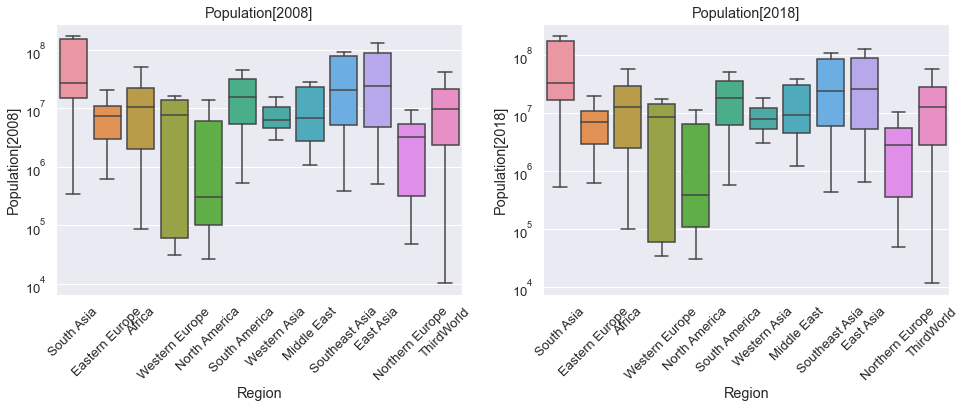

In [33]:
plot_graph(df1 , 'Population[2008]' , 'Population[2018]' , 'Population[2008]' , 'Population[2018]' , fliers=False)

### Compare "Population" of all regions between YR2008 and YR2018 (with outlier)

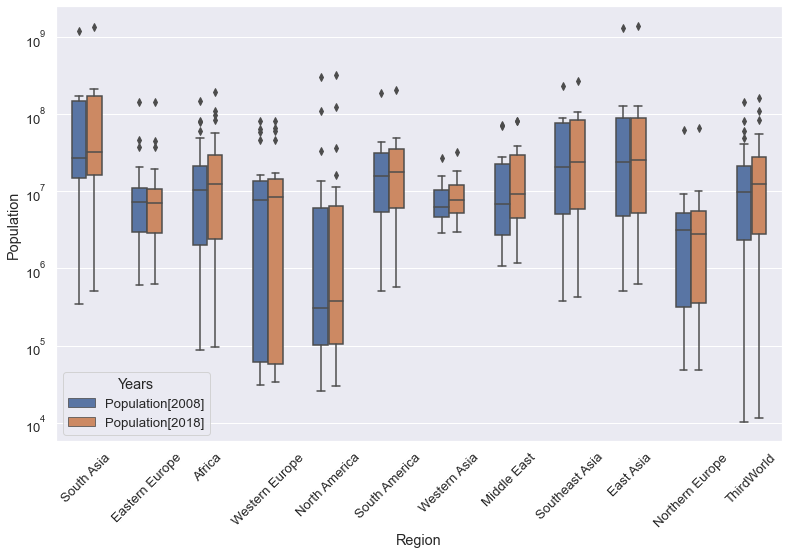

In [34]:
plt.figure(figsize = (13,8))
ax = sns.boxplot(data=df2, x='Region', y='Population' , hue="Years" , width=0.5 )
ax.set_yscale("log")
ax.tick_params(axis='x', rotation=45)

### Compare "Population" of all regions between YR2008 and YR2018 (without outlier)

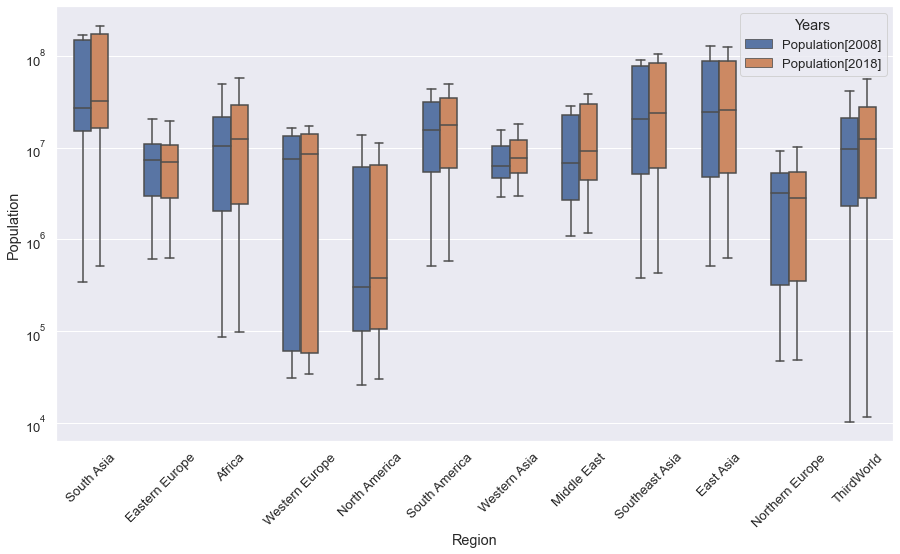

In [35]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data=df2, x='Region', y='Population' , hue="Years" , width=0.5 , showfliers=False)
ax.set_yscale("log")
ax.tick_params(axis='x', rotation=45)

# Umemployment

In [36]:
unemployment = pd.read_csv('unemployment.csv')
unemployment.head()

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,..,..,..,..,..,..,...,..,1.69,..,7.91,..,..,11.18,..,..,11.71
1,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,9.5,9.1,26.5,22.3,18.4,12.9,...,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.3,11.47,..
2,Algeria,DZA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,21.26,20.6,24.38,26.23,27.74,31.84,...,9.96,10.97,9.82,10.21,11.21,10.2,13.57,..,..,..
3,American Samoa,ASM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,5.11,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [37]:
unemployment.replace({'..':np.nan} , inplace=True)
unemployment

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.69,NaN,7.91,NaN,NaN,11.18,NaN,NaN,11.71
1,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,9.5,9.1,26.5,22.3,18.4,12.9,...,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.3,11.47,NaN
2,Algeria,DZA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,21.26,20.6,24.38,26.23,27.74,31.84,...,9.96,10.97,9.82,10.21,11.21,10.2,13.57,NaN,NaN,NaN
3,American Samoa,ASM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,5.11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

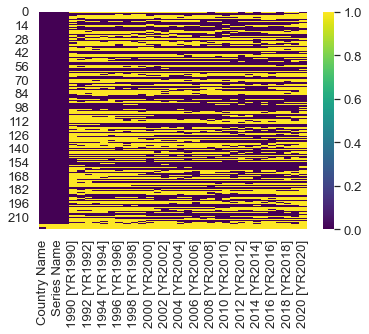

In [38]:
sns.heatmap(unemployment.isnull(),cmap='viridis')

In [39]:
df1 = regions.join(unemployment[["2005 [YR2005]" , "2017 [YR2017]"]])
df1

,CountryName,Region,ThirdWorld,2005 [YR2005],2017 [YR2017]
0,Afghanistan,South Asia,1,NaN,11.18
1,Albania,Eastern Europe,0,14.1,13.62
2,Algeria,Africa,0,15.27,13.57
3,American Samoa,Australia and Oceanea,0,9.98,NaN
4,Andorra,Western Europe,0,NaN,NaN
...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,NaN,NaN
213,West Bank and Gaza,Middle East,0,20.02,25.68
214,"Yemen, Rep.",Middle East,1,16.05,NaN
215,Zambia,Africa,1,15.9,11.63


In [40]:
df1.drop(df1[df1.Region == "Thailand"].index , inplace=True)
df1.drop(df1[df1.Region == "Australia and Oceanea"].index , inplace=True)
df1 = df1.dropna()
df1

,CountryName,Region,ThirdWorld,2005 [YR2005],2017 [YR2017]
1,Albania,Eastern Europe,0,14.1,13.62
2,Algeria,Africa,0,15.27,13.57
7,Argentina,South America,0,11.51,8.35
11,Austria,Western Europe,0,5.63,5.5
12,Azerbaijan,Western Asia,0,7.26,5
...,...,...,...,...,...
207,Uruguay,South America,0,12.01,7.89
208,Uzbekistan,Western Asia,0,0.3,5.8
210,"Venezuela, RB",South America,0,10.66,5.05
213,West Bank and Gaza,Middle East,0,20.02,25.68


<AxesSubplot:>

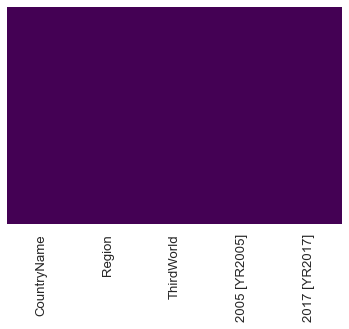

In [41]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
df1 = df1.astype({'2005 [YR2005]':float, '2017 [YR2017]':float})
df1.rename(columns={'2005 [YR2005]':'Unemployment[2005]','2017 [YR2017]':'Unemployment[2017]'} , inplace=True)
# df1 = df1.astype({'Unemployment[2005]':float, 'Unemployment[2017]':float})
# df1.loc[:,['Unemployment[2005]']] = df1['Unemployment[2005]'].astype(np.float64)
# df1.loc[:,['Unemployment[2017]']] = df1['Unemployment[2017]'].astype(np.float64)

In [43]:
df1_copy = df1.copy()
df1_copy = df1_copy.loc[ df1_copy["ThirdWorld"] == 1]
df1_copy["Region"] = 'ThirdWorld'

In [44]:
df1 = df1.append(df1_copy , ignore_index=True)
df1.drop(['ThirdWorld'], axis=1 , inplace=True)
df1

,CountryName,Region,Unemployment[2005],Unemployment[2017]
0,Albania,Eastern Europe,14.10,13.62
1,Algeria,Africa,15.27,13.57
2,Argentina,South America,11.51,8.35
3,Austria,Western Europe,5.63,5.50
4,Azerbaijan,Western Asia,7.26,5.00
...,...,...,...,...
101,Lao PDR,ThirdWorld,1.35,9.41
102,Malawi,ThirdWorld,0.94,5.76
103,Niger,ThirdWorld,3.10,7.77
104,Uganda,ThirdWorld,1.90,10.09


In [45]:
df2 = df1.copy()
df2 = df2.melt(id_vars=["CountryName", "Region"], var_name="Years", value_name="Unemployment(%)")
df2

,CountryName,Region,Years,Unemployment(%)
0,Albania,Eastern Europe,Unemployment[2005],14.10
1,Algeria,Africa,Unemployment[2005],15.27
2,Argentina,South America,Unemployment[2005],11.51
3,Austria,Western Europe,Unemployment[2005],5.63
4,Azerbaijan,Western Asia,Unemployment[2005],7.26
...,...,...,...,...
207,Lao PDR,ThirdWorld,Unemployment[2017],9.41
208,Malawi,ThirdWorld,Unemployment[2017],5.76
209,Niger,ThirdWorld,Unemployment[2017],7.77
210,Uganda,ThirdWorld,Unemployment[2017],10.09


### Unemployment 2008 , Unemployment 2018 with outlier

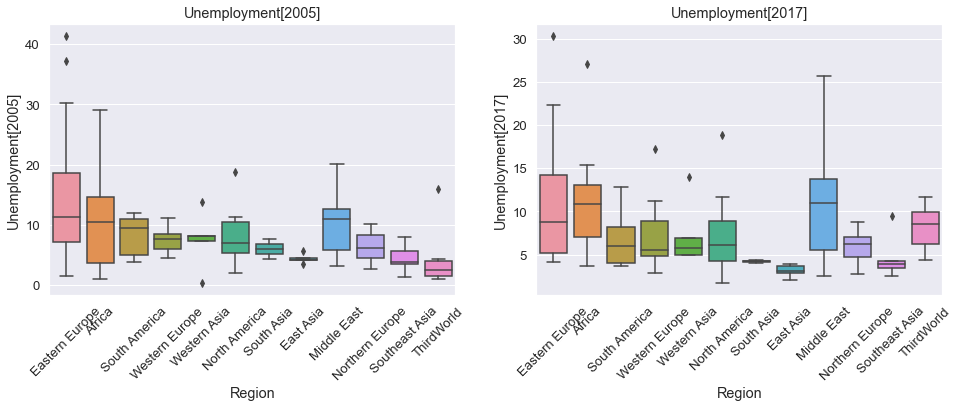

In [46]:
plot_graph(df1 , 'Unemployment[2005]' , 'Unemployment[2017]' , 'Unemployment[2005]' , 'Unemployment[2017]' , log=False)

### Unemployment 2008 , Unemployment 2018 without outlier

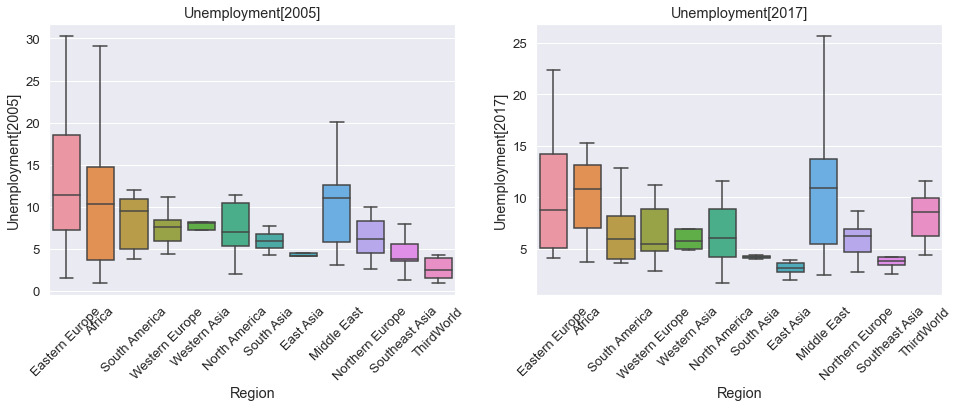

In [47]:
plot_graph(df1 , 'Unemployment[2005]' , 'Unemployment[2017]' , 'Unemployment[2005]' , 'Unemployment[2017]' , log=False, fliers=False )

### Compare "Unemployment" of all regions between YR2008 and YR2018 (with outlier)

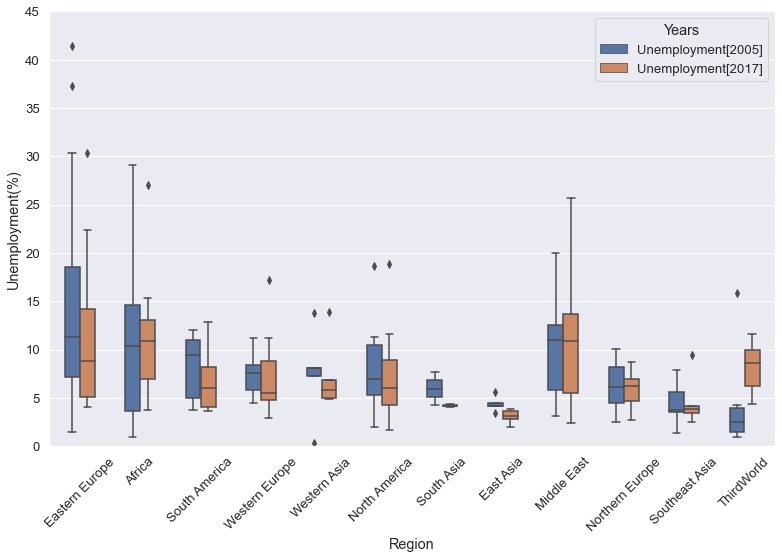

In [48]:
plt.figure(figsize = (13,8))
ax = sns.boxplot(data=df2, x='Region', y='Unemployment(%)' , hue="Years" , width=0.5)
ax.set_ylim(0,45)
ax.tick_params(axis='x', rotation=45)

### Compare "Unemployment" of all regions between YR2008 and YR2018 (without outlier)

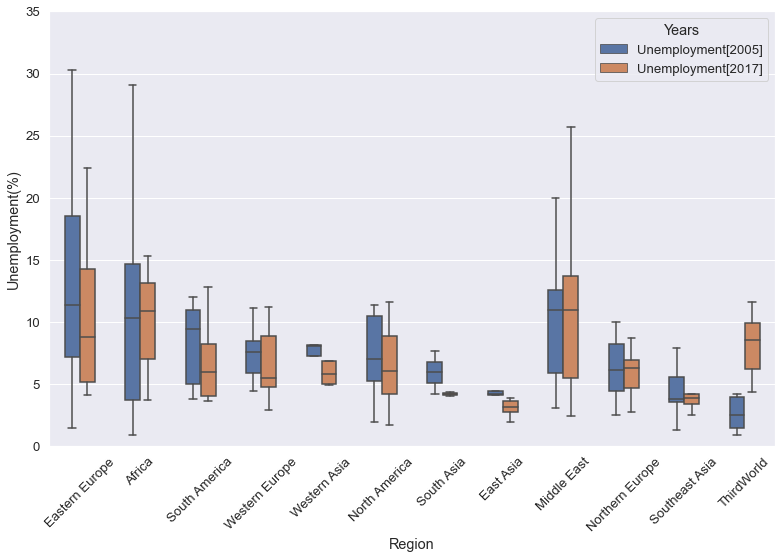

In [51]:
plt.figure(figsize = (13,8))
ax = sns.boxplot(data=df2, x='Region', y='Unemployment(%)' , hue="Years" , width=0.5 , showfliers=False)
ax.set_ylim(0,35)
ax.tick_params(axis='x', rotation=45)